In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [3]:
df = pd.read_csv('densenet_confidence.csv', index_col=0)
df.head()

,threshold,test,exit,sample,exited,prediction,target,correct,score,time
0,0.1,0,0,0,1,0,0,True,0.937627,946.3954
1,0.1,0,1,0,1,0,0,True,0.988646,957.7846
2,0.1,0,2,0,1,0,0,True,0.999755,980.2497
3,0.1,0,3,0,1,0,0,True,0.999998,994.8174
4,0.1,0,0,1,1,0,0,True,0.976232,8.1062


In [4]:
df.loc[(df['threshold'] == 0.4) & (df['exit'] == 0) & (df['exited']==1) & (df['correct']==0)]

,threshold,test,exit,sample,exited,prediction,target,correct,score,time
6104,0.4,3,0,26,1,8,0,False,1.792840e-02,6.2407
6120,0.4,3,0,30,1,5,0,False,2.903327e-01,6.4463
6208,0.4,3,0,52,1,7,1,False,3.974799e-04,6.0473
6224,0.4,3,0,56,1,7,1,False,8.356138e-04,6.5017
6272,0.4,3,0,68,1,6,1,False,4.158236e-06,6.1988
6304,0.4,3,0,76,1,2,1,False,1.859088e-04,7.8034
6368,0.4,3,0,92,1,2,1,False,3.661961e-04,6.7015
6380,0.4,3,0,95,1,7,1,False,1.493760e-04,6.2426
6408,0.4,3,0,102,1,7,2,False,3.180312e-01,6.0802
6412,0.4,3,0,103,1,1,2,False,6.703243e-06,5.7977


In [5]:
exited = []
acc = []
false = []
exit_acc = []
for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1) & (df['correct']==1)])/n_exited)
        exit_n_false.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['exited']==1) & (df['correct']==0)])/n_exited)
        exit_n_acc.append(len(df.loc[(df['threshold'] == t) & (df['exit'] == exit) & (df['correct']==1)])/500)
    exited.append(exit_n_frac)
    acc.append(exit_n_acc_exited)
    false.append(exit_n_false)
    exit_acc.append(exit_n_acc)

In [6]:
exit_acc

[[0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626, 0.626],
 [0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904, 0.904],
 [0.944, 0.944, 0.944, 0.944, 0.944, 0.944, 0.944, 0.944, 0.944],
 [0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964]]

In [7]:
acc

[[0.626,
  0.6265060240963856,
  0.6437768240343348,
  0.7310704960835509,
  0.7927631578947368,
  0.8858447488584474,
  0.9341317365269461,
  0.9833333333333333,
  0.9875],
 [0.904,
  0.904,
  0.905811623246493,
  0.9102040816326531,
  0.925531914893617,
  0.945823927765237,
  0.966183574879227,
  0.9794344473007712,
  0.9970588235294118],
 [0.944,
  0.944,
  0.944,
  0.9457831325301205,
  0.951417004048583,
  0.9667359667359667,
  0.9786324786324786,
  0.9846491228070176,
  0.9931818181818182],
 [0.964,
  0.964,
  0.964,
  0.9678714859437751,
  0.969758064516129,
  0.97165991902834,
  0.9755102040816327,
  0.9792099792099792,
  0.9850107066381156]]

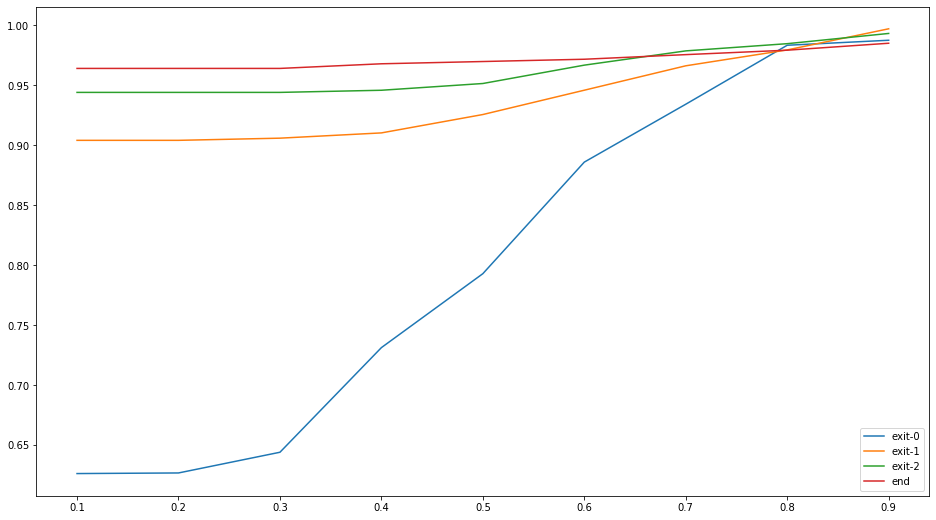

In [8]:
plt.figure(figsize=(16,9))
for i, a in enumerate(acc):
    plt.plot(np.arange(0.1, 1, 0.1), acc[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

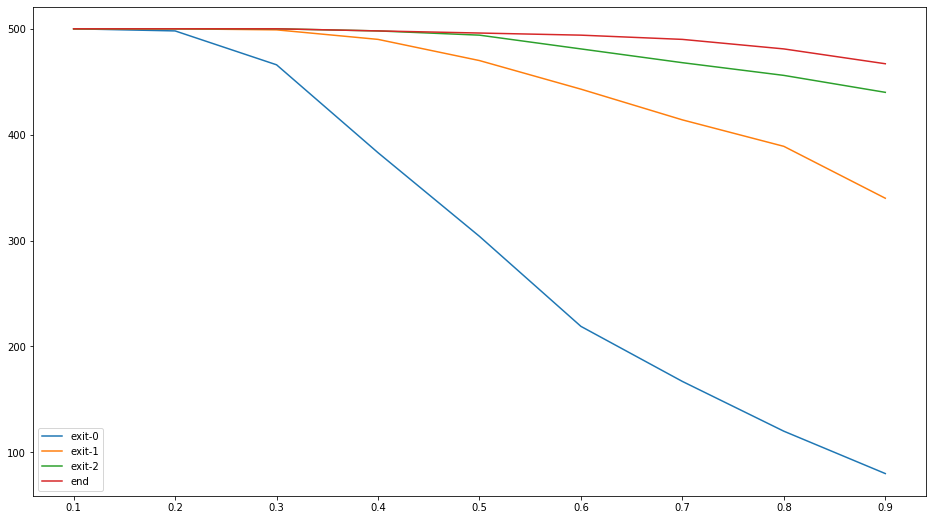

In [9]:
plt.figure(figsize=(16,9))
for i, a in enumerate(exited):
    plt.plot(np.arange(0.1, 1, 0.1), exited[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

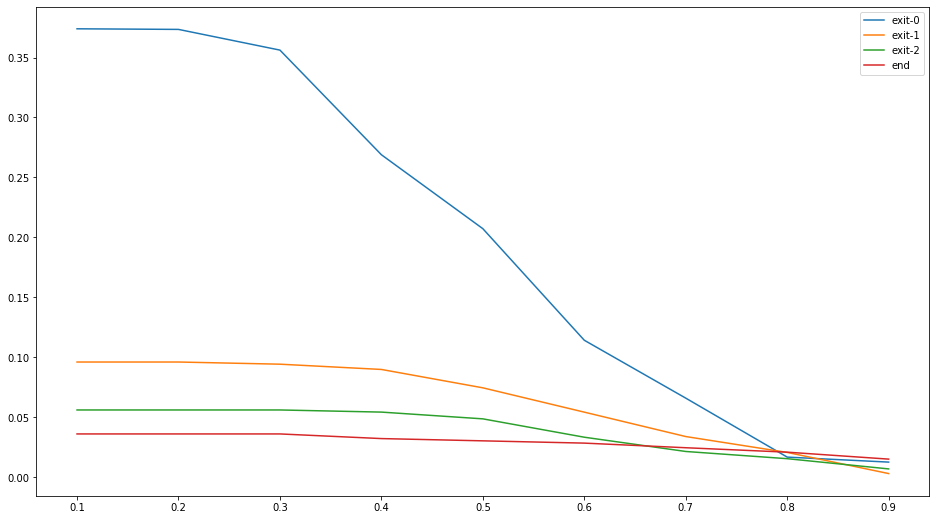

In [10]:
plt.figure(figsize=(16,9))
for i, a in enumerate(false):
    plt.plot(np.arange(0.1, 1, 0.1), false[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

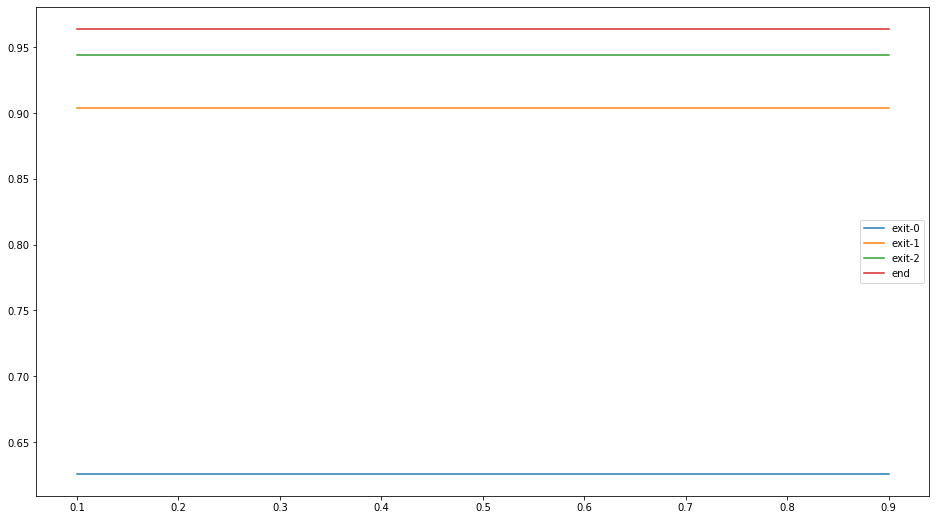

In [11]:
plt.figure(figsize=(16,9))
for i, a in enumerate(exit_acc):
    plt.plot(np.arange(0.1, 1, 0.1), exit_acc[i])
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()